# import

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 전처리


In [41]:
test5 = pd.read_csv('2019_전처리_최종.csv')
test5.round(2)

,총생활인구수,기온,기압,풍속,운량,일강수량,최대순간풍속풍향,최대풍속풍향,평균풍속,최다풍향,일최심적설,일최심신적설,강수여부,일 미세먼지 농도(㎍/㎥),휴일여부,요일,계절,month,day,영등포구
0,434808.29,3.39,-1.16,-0.00,-0.76,0.0,290,270,2.1,290,0.0,0.0,0.0,41.0,1,1,4,1,1,687.0
1,502461.14,3.46,-1.21,-0.94,-1.66,0.0,320,320,1.7,270,0.0,0.0,0.0,38.0,0,2,4,1,2,1326.0
2,504706.95,3.24,-1.19,-1.74,-1.93,0.0,290,270,1.4,290,0.0,0.0,0.0,41.0,0,3,4,1,3,1508.0
3,505769.67,2.69,-1.01,-1.39,-0.48,0.0,180,200,1.2,20,0.0,0.0,0.0,77.0,0,4,4,1,4,1590.0
4,453707.18,3.13,-1.17,-0.44,-1.78,0.0,250,320,2.2,290,0.0,0.0,0.0,73.0,0,5,4,1,5,892.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,491922.71,2.84,-1.12,-0.26,-1.42,0.0,290,290,2.1,340,0.0,0.0,0.0,37.0,0,4,4,12,27,2466.0
361,442390.37,2.35,-1.04,-1.15,-0.85,0.0,70,70,2.0,70,0.0,0.0,0.0,47.0,0,5,4,12,28,1772.0
362,436722.78,1.85,-0.90,-0.52,-0.49,1.4,110,70,2.9,70,0.0,0.0,1.0,47.0,0,6,4,12,29,1265.0
363,488213.64,2.07,-0.75,3.03,0.58,0.4,320,320,2.9,320,0.0,0.0,1.0,43.0,0,0,4,12,30,1931.0


# LinearRegression, Ridge, Lasso

In [42]:
test5[[ '강수여부','휴일여부','요일', '계절', 'month','day',]]= test5[[ '강수여부','휴일여부','요일', '계절', 'month','day']].astype('str')

In [43]:
def get_rmse(model):
    import numpy as np
    from sklearn.metrics import mean_squared_error
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, 'RMSE: ', np.round(rmse,3))
    return rmse
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [44]:
X = test5.drop(columns=['영등포구'])
y = test5['영등포구']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

In [45]:
lr_reg = LinearRegression() #선형회귀
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models) # R2 점수 추가함

LinearRegression RMSE:  1021.728
Ridge RMSE:  1019.023
Lasso RMSE:  1015.071


[1021.7282491959043, 1019.0234112186779, 1015.0705091976139]

In [46]:
# 왜곡도 확인
features_index = test5.dtypes[test5.dtypes != 'object'].index
skew_features= test5[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features>3]
skew_features_top.sort_values(ascending=False)

일최심신적설    13.732948
일최심적설     13.123167
일강수량       5.053976
dtype: float64

In [47]:
# 왜곡도 1 이상은 로그로 변환
test5[skew_features_top.index]= np.log1p(test5[skew_features_top.index])

<AxesSubplot:xlabel='영등포구', ylabel='Count'>

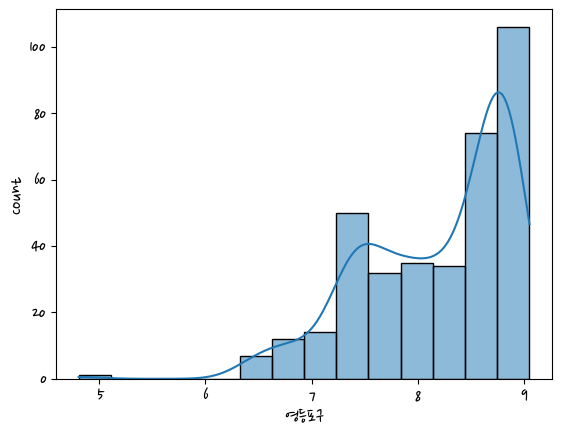

In [48]:
# y값 정규분포로 변환
log_test = np.log1p(test5['영등포구'])
sns.histplot(log_test, kde=True)

In [49]:
# 문자열 치환 원앤핫인코딩
test5 = pd.get_dummies(test5)
X = test5.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=156)

In [50]:
# 모델 확인
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

MSE: 0.0776453151292961, RMSE: 0.2786490895899287, R2: 0.8462938384966457
LinearRegression RMSE:  0.279
Ridge RMSE:  0.267
Lasso RMSE:  0.67


[0.2786490895899287, 0.2672420513996855, 0.6695915246054243]

In [51]:
# 루트치환값 다시 원래대로 돌려서 비교
y_t= np.expm1(y_test)
p_t = np.expm1(pred)
for solve, predd in zip(y_t, p_t):
    print(f'{solve}, {predd}') 

5504.999999999998, 5809.859638959739
5411.000000000005, 4725.347595242919
686.9999999999999, 1102.1042684947972
7848.000000000002, 7387.227138931376
2401.0000000000005, 1988.0311674392062
1796.0000000000005, 1822.4969858138697
1367.9999999999998, 1265.291843238509
5922.000000000001, 7097.605252740273
7227.999999999995, 6705.295949163094
4034.999999999999, 4498.398504936073
6975.000000000002, 6829.761291560698
6163.9999999999945, 3886.0985141801802
6929.999999999994, 3827.212680197389
7634.000000000002, 6341.018235218811
4096.000000000003, 4736.198275667181
2255.999999999999, 2594.6729936409033
6442.0, 6113.929704297709
6458.0000000000055, 5669.663138215072
1692.9999999999993, 1772.9080566290734
4667.0, 3811.128801425233
6212.000000000005, 6415.615712838885
7135.999999999995, 8731.91985528997
5531.000000000003, 4983.25292240161
7344.000000000006, 6282.626332606757
2559.0, 1715.6104032995997
4311.000000000003, 6720.346262271672
7366.999999999995, 7455.398224932743
1824.9999999999993, 171

## cross_val_score

In [52]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [53]:
X_data = test5.drop(columns=['영등포구'])
y_target = test5['영등포구']


ridge = Ridge(alpha=5)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [54]:
def get_avg_rmse_cv(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=5)) #rmse = 5개가 나올 것
        rmse_avg = np.mean(rmse_list)
        print(f'{model.__class__.__name__} cv rmse 값 리스트 : {np.round(rmse_list,3)}')
        print(f'{model.__class__.__name__} cv 평균 rmse 값 : {np.round(rmse_avg,3)}')

get_avg_rmse_cv(models)

LinearRegression cv rmse 값 리스트 : [6.98858591e+06 2.70000000e-01 3.42000000e-01 3.03000000e-01
 3.50000000e-01]
LinearRegression cv 평균 rmse 값 : 1397717.435
Ridge cv rmse 값 리스트 : [0.724 0.27  0.331 0.317 0.343]
Ridge cv 평균 rmse 값 : 0.397
Lasso cv rmse 값 리스트 : [1.23  0.643 0.608 0.578 0.551]
Lasso cv 평균 rmse 값 : 0.722


## GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
def print_best_params(model,params):
    grid_model = GridSearchCV(model,params,scoring='neg_mean_squared_error', cv=10) #GridSearchCV라서 scoring='neg' #scoring='neg_mean_squared_error' 예측값과 차이의 제곱?
    grid_model.fit(X,y)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print(f'{model.__class__.__name__} 5 cv시 최적 평균 rmse 값:{np.round(rmse, 4)}, 최적 alpha값:{grid_model.best_params_}')

In [57]:
ridge_param = {
    'alpha':[0.0001,0.01,0.05, 0.1, 1, 5, 8, 10, 12, 15, 20, 30, 40, 50, 100]
} #ridge더 크게 rasso 더 작게
print_best_params(ridge_reg, ridge_param)

Ridge 5 cv시 최적 평균 rmse 값:0.3243, 최적 alpha값:{'alpha': 5}


In [58]:
lasso_param = {'alpha':[0.0001,0.001, 0.005, 0.008, 0.05, 0.05, 0.1, 0.5, 1, 5, 10, 15, 30]} 
print_best_params(lasso_reg, lasso_param)

Lasso 5 cv시 최적 평균 rmse 값:0.3451, 최적 alpha값:{'alpha': 0.005}


In [59]:
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)

ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train,y_train)

lasso_reg = Lasso(alpha=0.005)
lasso_reg.fit(X_train,y_train)

models=[lr_reg, ridge_reg,lasso_reg] 
get_rmses(models)

#visualize_coefficient(models)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')


LinearRegression RMSE:  0.279
Ridge RMSE:  0.257
Lasso RMSE:  0.257
MSE: 0.0776453151292961, RMSE: 0.2786490895899287, R2: 0.8462938384966457


In [60]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')




ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
models = [lr_reg, ridge_reg, lasso_reg]

for model in models:
    get_rmse(model)

MSE: 0.0776453151292961, RMSE: 0.2786490895899287, R2: 0.8462938384966457
LinearRegression RMSE:  0.279
Ridge RMSE:  0.267
Lasso RMSE:  0.67


# RandomForestRegressor

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [63]:
rf_clf = RandomForestRegressor(random_state=156, max_depth=8)
rf_clf.fit(X_train,y_train)

pred = rf_clf.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')


MSE: 0.10142776817355936, RMSE: 0.31847726476714056, R2: 0.8499163833432435


In [64]:
log_test = np.log1p(test5['영등포구'])
test5 = pd.get_dummies(test5)
X = test5.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [65]:
rf_clf = RandomForestRegressor(random_state=32, max_depth=8)
rf_clf.fit(X_train,y_train)

pred = rf_clf.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

MSE: 0.09936942158876189, RMSE: 0.31522915726303286, R2: 0.852962138025047


## GridSearchCV 
RandomForestRegressor - 하이퍼 파라미터 수정

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
params = {
    'max_depth': [6, 12, 18, 26, 30],
    'min_samples_leaf': [1, 6, 12, 18, 24],
    'min_samples_split':[2, 6, 12, 18, 24]
}

In [68]:
rf_clf = RandomForestRegressor(n_estimators=100, random_state=32, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미너:\n', grid_cv.best_params_)

최적 하이퍼 파라미너:
 {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [69]:
rf_clf1    = RandomForestRegressor(n_estimators=100, max_depth=12, min_samples_leaf=1, min_samples_split=6, random_state=32)
rf_clf1.fit(X_train,y_train)

pred = rf_clf1.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')


MSE: 0.10255825448064829, RMSE: 0.320247177162654, R2: 0.8482435921874871


# XGBoost 

In [70]:
import xgboost as xgb
from xgboost import XGBRegressor

In [71]:
import xgboost

print(xgboost.__version__)

1.5.0


In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [73]:
#학습용(80%), 데이터용(20%)
log_test = np.log1p(test5['영등포구'])
#test = test5['영등포구']
test5 = pd.get_dummies(test5)
X = test5.drop(columns=['영등포구'])
y = log_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=32)

In [74]:
#최종 학습용(90%), 검즘용(10%)
X_tr, X_val, y_tr, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=32)

In [75]:
#학습, 검증, 테스트용 DMatrix 생성
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [76]:
params = {
    'max_depth':3,
    'eta':0.05,
    #'objective':'binary:logistic',
    # 'eval_metric':'logloss'
}
num_rounds = 400

In [77]:
eval_list = [(dtr,'train'),(dval,'eval')]
xgb_model = xgb.train(params = params, dtrain=dtr, num_boost_round=num_rounds,
                      early_stopping_rounds=500, evals=eval_list)

# pred = xgb_model.predict(dtest)
# print(pred)

pred = xgb_model.predict(dtest)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')


[0]	train-rmse:7.36545	eval-rmse:7.25871
[1]	train-rmse:7.00114	eval-rmse:6.89549
[2]	train-rmse:6.65498	eval-rmse:6.55038
[3]	train-rmse:6.32604	eval-rmse:6.22399
[4]	train-rmse:6.01348	eval-rmse:5.91126
[5]	train-rmse:5.71650	eval-rmse:5.61667
[6]	train-rmse:5.43431	eval-rmse:5.33439
[7]	train-rmse:5.16620	eval-rmse:5.06647
[8]	train-rmse:4.91146	eval-rmse:4.81393
[9]	train-rmse:4.66943	eval-rmse:4.57195
[10]	train-rmse:4.43950	eval-rmse:4.34412
[11]	train-rmse:4.22105	eval-rmse:4.12580
[12]	train-rmse:4.01354	eval-rmse:3.91847
[13]	train-rmse:3.81641	eval-rmse:3.72334
[14]	train-rmse:3.62917	eval-rmse:3.53637
[15]	train-rmse:3.45123	eval-rmse:3.36024
[16]	train-rmse:3.28213	eval-rmse:3.19129
[17]	train-rmse:3.12144	eval-rmse:3.03355
[18]	train-rmse:2.96876	eval-rmse:2.88166
[19]	train-rmse:2.82368	eval-rmse:2.73586
[20]	train-rmse:2.68579	eval-rmse:2.60074
[21]	train-rmse:2.55479	eval-rmse:2.47142
[22]	train-rmse:2.43031	eval-rmse:2.34960
[23]	train-rmse:2.31195	eval-rmse:2.23080
[2

In [78]:
y_t= np.expm1(y_test)
p_t = pd.Series(np.expm1(pred))
for solve, predd in zip(y_t, p_t):
    print(f'{solve}, {predd}') 

# mse = mean_squared_error(dtest, pred)
# rmse = np.sqrt(mse)

# print(f'MSE: {mse}, RMSE: {rmse}, R2: {r2_score(y_test, pred)}')

6407.999999999995, 6240.59326171875
2178.000000000001, 2049.991455078125
121.00000000000003, 646.9926147460938
7848.000000000002, 6797.53173828125
7208.999999999997, 6589.638671875
2984.000000000001, 2447.6923828125
1610.9999999999995, 1408.7918701171875
6075.999999999996, 6827.59765625
5495.000000000005, 5409.078125
755.0000000000002, 777.2236328125
7050.000000000006, 3113.9970703125
2652.999999999999, 2366.33203125
1708.9999999999995, 2306.778076171875
6117.999999999999, 4849.96435546875
1934.0000000000005, 2363.160888671875
1367.9999999999998, 1569.2628173828125
2559.0, 1961.3699951171875
5922.000000000001, 5790.81396484375
8007.000000000001, 6748.53125
2916.999999999999, 3002.023193359375
5119.999999999998, 5911.91162109375
5835.000000000004, 5873.65673828125
3261.0000000000023, 2527.884521484375
1664.9999999999993, 1566.7332763671875
2161.999999999999, 2483.2607421875
1748.9999999999995, 1135.977294921875
1684.0, 1512.205810546875
1312.9999999999995, 1670.2674560546875
6737.000000

# GBM

In [82]:
from sklearn.ensemble import GradientBoostingRegressor
import time

In [83]:
gb_ref = GradientBoostingRegressor(random_state=156)
gb_ref.fit(X_train, y_train)
gb_pred = gb_ref.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')

RMSE:  0.299
R2: 0.8673945462841277


In [84]:
gb_ref = GradientBoostingRegressor(n_estimators=200, max_depth=16, min_samples_leaf=6, min_samples_split=2, random_state=156)
gb_ref.fit(X_train, y_train)
gb_pred = gb_ref.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, pred)}')

RMSE:  0.299
R2: 0.8673945462841277


# LightGBM

In [85]:
from lightgbm import LGBMRegressor

In [86]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.05)

evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm.fit(X_tr, y_tr, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm.predict(X_test)

mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
print('RMSE: ', np.round(rmse,3))
print(f'R2: {r2_score(y_test, preds)}')

[1]	training's l2: 0.389781	valid_1's l2: 0.531604
Training until validation scores don't improve for 100 rounds
[2]	training's l2: 0.360917	valid_1's l2: 0.49878
[3]	training's l2: 0.334796	valid_1's l2: 0.470167
[4]	training's l2: 0.311208	valid_1's l2: 0.443014
[5]	training's l2: 0.289882	valid_1's l2: 0.419606
[6]	training's l2: 0.269766	valid_1's l2: 0.387841
[7]	training's l2: 0.251862	valid_1's l2: 0.36001
[8]	training's l2: 0.23529	valid_1's l2: 0.338118
[9]	training's l2: 0.220014	valid_1's l2: 0.321596
[10]	training's l2: 0.206191	valid_1's l2: 0.305825
[11]	training's l2: 0.19352	valid_1's l2: 0.286484
[12]	training's l2: 0.182387	valid_1's l2: 0.271979
[13]	training's l2: 0.172134	valid_1's l2: 0.261005
[14]	training's l2: 0.162238	valid_1's l2: 0.248258
[15]	training's l2: 0.153538	valid_1's l2: 0.234545
[16]	training's l2: 0.145136	valid_1's l2: 0.224941
[17]	training's l2: 0.137925	valid_1's l2: 0.213596
[18]	training's l2: 0.131249	valid_1's l2: 0.206524
[19]	training's

In [87]:
from lightgbm import plot_importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

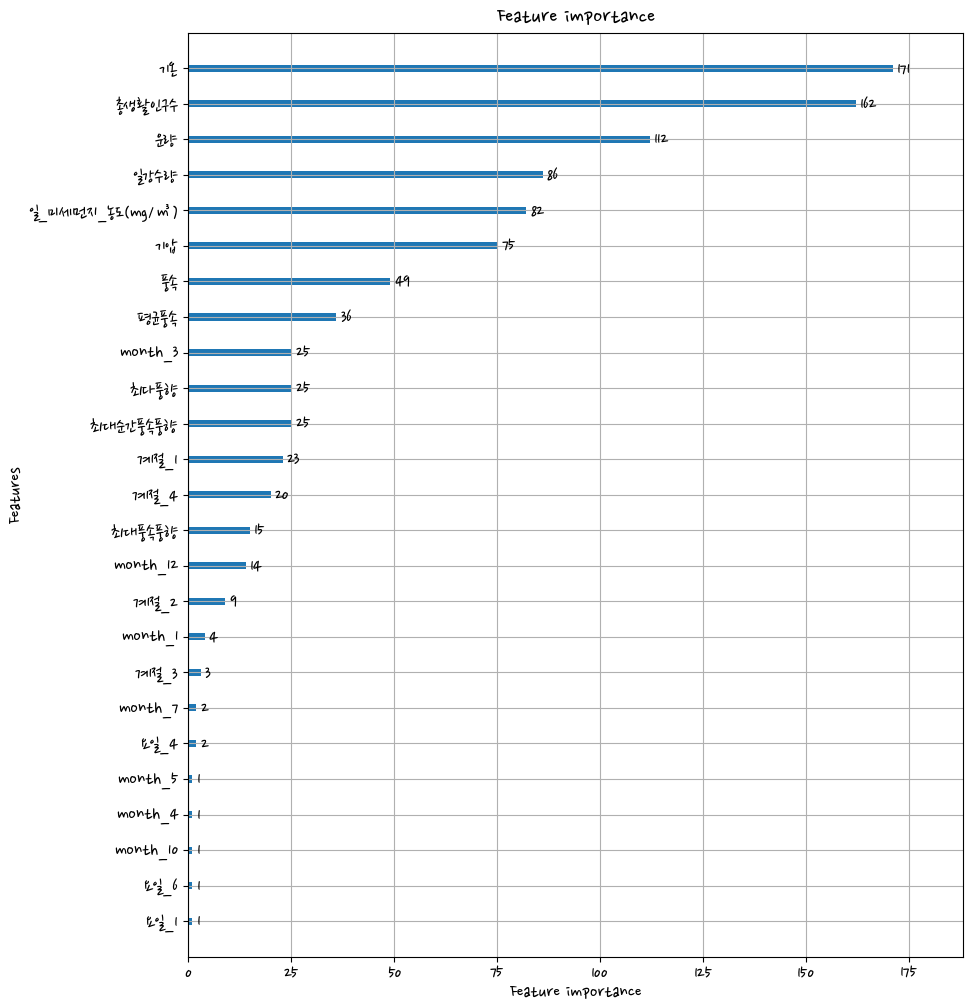

In [88]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm, ax=ax)

In [89]:
for solve, predd in zip(np.expm1(y_test), np.expm1(pred)):
    print(f'{solve}, {predd}')

6407.999999999995, 6240.59326171875
2178.000000000001, 2049.991455078125
121.00000000000003, 646.9926147460938
7848.000000000002, 6797.53173828125
7208.999999999997, 6589.638671875
2984.000000000001, 2447.6923828125
1610.9999999999995, 1408.7918701171875
6075.999999999996, 6827.59765625
5495.000000000005, 5409.078125
755.0000000000002, 777.2236328125
7050.000000000006, 3113.9970703125
2652.999999999999, 2366.33203125
1708.9999999999995, 2306.778076171875
6117.999999999999, 4849.96435546875
1934.0000000000005, 2363.160888671875
1367.9999999999998, 1569.2628173828125
2559.0, 1961.3699951171875
5922.000000000001, 5790.81396484375
8007.000000000001, 6748.53125
2916.999999999999, 3002.023193359375
5119.999999999998, 5911.91162109375
5835.000000000004, 5873.65673828125
3261.0000000000023, 2527.884521484375
1664.9999999999993, 1566.7332763671875
2161.999999999999, 2483.2607421875
1748.9999999999995, 1135.977294921875
1684.0, 1512.205810546875
1312.9999999999995, 1670.2674560546875
6737.000000

In [ ]:
from hyperopt import hp

In [ ]:
lgb_space = {
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1,2,1),
    'learning_rate':hp.uniform('learning_rate',0.01,0.2),
    'colsample_bytree' : hp.uniform('colsample_bytree',0.5,1)
}


In [ ]:
from hyperopt import STATUS_OK

In [ ]:
# def objective_func(lgb_space):
#     max_depth=lgb_space[max_depth]
#     min_child_weight=lgb_space[min_child_weight]
#     learning_rate=lgb_space[learning_rate]
#     colsample_bytree=lgb_space[colsample_bytree]
#     reval = 

In [ ]:
from hyperopt import fmin, tpe, Trials

In [ ]:
# trival_val = Trials()

# best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5,
#               trials=trial_val, rstate=np.random.default_rng(seed=0))
# print('best:',best_01)